In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Use a function which will give a value count of all object dtypes in df.

In [5]:
def value_counts_all_object_columns(dataframe):
    # Filter only object columns
    object_columns = dataframe.select_dtypes(include='object').columns
    
    # Apply value_counts() to each object column
    for column in object_columns:
        print(f"Value counts for column '{column}':")
        print(dataframe[column].value_counts(dropna=False))
        print("\n")

value_counts_all_object_columns(df)

Value counts for column 'Workclass':
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Value counts for column 'Education':
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Value counts for column 'Marital Status':
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spous

# In order to save memory and boost performance, let's convert object columns to category.

## By default, columns containing strings are not stored using pandas' category dtype, as not every column containing strings needs to be categorical.
- Convert object type to categorical, and read back the data to df again.

In [6]:
df_dtypes = {
  'Workclass': 'category',
  'Education': 'category',
  'Marital Status': 'category',
  'Relationship': 'category',
  'Above/Below 50k': 'category'
}

df2 = pd.read_csv('adult.csv',dtype=df_dtypes)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              32561 non-null  int64   
 1   Workclass        32561 non-null  category
 2   fnlgwt           32561 non-null  int64   
 3   Education        32561 non-null  category
 4   Education Num    32561 non-null  int64   
 5   Marital Status   32561 non-null  category
 6   Occupation       32561 non-null  object  
 7   Relationship     32561 non-null  category
 8   Race             32561 non-null  object  
 9   Sex              32561 non-null  object  
 10  Capital Gain     32561 non-null  int64   
 11  Capital Loss     32561 non-null  int64   
 12  Hours/Week       32561 non-null  int64   
 13  Country          32561 non-null  object  
 14  Above/Below 50k  32561 non-null  category
dtypes: category(5), int64(6), object(4)
memory usage: 2.6+ MB


# Using a new dataset, let's set, add, and remove categories.

In [7]:
dogs = pd.read_csv('ShelterDogs.csv')
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The .cat accesor object will be used to access and manipulate the categories of a categorical Series.
- set_categories
- inplace
- ordered
- add_categories
- remove_categories
- rename_categories

In [8]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

# Convert the 'size' column into a ordered categorical series.

In [9]:
dogs['size'].value_counts(dropna=False)

medium    1944
large      519
small      474
Name: size, dtype: int64

In [10]:
dogs['size'] = dogs['size'].astype('category').cat.set_categories(
    new_categories=['small','medium','large'],
    ordered=True)

In [11]:
dogs['size'].dtype

CategoricalDtype(categories=['small', 'medium', 'large'], ordered=True)

In [12]:
value_counts_all_object_columns(dogs)

Value counts for column 'name':
NaN        92
Lili       18
Kormi      11
Maci       10
Buksi       9
           ..
Ilka        1
Dixi        1
Páfrány     1
Tepertõ     1
Kölni       1
Name: name, Length: 2017, dtype: int64


Value counts for column 'sex':
male      1681
female    1256
Name: sex, dtype: int64


Value counts for column 'breed':
Unknown Mix                                             1524
German Shepherd Dog Mix                                  190
Dachshund Mix                                            147
Labrador Retriever Mix                                    83
Staffordshire Terrier Mix                                 62
                                                        ... 
Border Collie, Spaniel Mix                                 1
Bull Terrier, Fox Terrier, Staffordshire Terrier Mix       1
Greyhound, Transylvanian Hound Mix                         1
Komondor Mix                                               1
German Pointer, Greyhound, Pointer Mix     

# Adding categories

In [13]:
dogs['keep_in'].value_counts(dropna=False)

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64

In [14]:
dogs['keep_in'] = dogs['keep_in'].astype('category').cat.add_categories(
    ["Unknown History", "Open Yard (Countryside)"])

In [15]:
dogs['keep_in'].value_counts(dropna=False)

both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64

In [16]:
dogs.likes_people.value_counts(dropna=False)

yes    1991
NaN     938
no        8
Name: likes_people, dtype: int64

# Removing categories
- Convert column from object to category
- Convert all 'maybe' responses from the 'likes_children' column to 'no'.
- Remove 'maybe' category from the column.

In [17]:
dogs["likes_children"] = dogs["likes_children"].astype('category')

In [18]:
dogs['likes_children'] = dogs['likes_children'].fillna('no')

In [19]:
dogs['likes_children'].value_counts()

no     1765
yes    1172
Name: likes_children, dtype: int64

In [20]:
dogs.likes_children.cat.categories

Index(['no', 'yes'], dtype='object')

In [21]:
dogs.likes_children.unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

# Updating categories

In [22]:
dogs['breed'] = dogs.breed.astype('category')
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 2937 non-null   int64   
 1   name               2845 non-null   object  
 2   age                2937 non-null   float64 
 3   sex                2937 non-null   object  
 4   breed              2937 non-null   category
 5   date_found         2937 non-null   object  
 6   adoptable_from     2937 non-null   object  
 7   posted             2937 non-null   object  
 8   color              2937 non-null   object  
 9   coat               2937 non-null   object  
 10  size               2937 non-null   category
 11  neutered           1852 non-null   object  
 12  housebroken        460 non-null    object  
 13  likes_people       1999 non-null   object  
 14  likes_children     2937 non-null   category
 15  get_along_males    1633 non-null   object  
 16  get_al

In [23]:
# Rename 'Unknown Mix' to 'Unknown'
dogs['breed'].value_counts()

Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

In [24]:
dogs['breed'] = dogs['breed'].cat.rename_categories({'Unknown Mix':'Unknown'})
dogs['breed'].value_counts()

Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

In [25]:
# Collapsing Categories
dogs['color'] = dogs.color.astype('category')

In [26]:
update_colors = {'black and brown':'black',
                'black and tan':'black',
                'black and white':'black'}
dogs['main_color'] = dogs['color'].replace(update_colors)

In [27]:
# Replace methods does preserve the categorical data type
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 2937 non-null   int64   
 1   name               2845 non-null   object  
 2   age                2937 non-null   float64 
 3   sex                2937 non-null   object  
 4   breed              2937 non-null   category
 5   date_found         2937 non-null   object  
 6   adoptable_from     2937 non-null   object  
 7   posted             2937 non-null   object  
 8   color              2937 non-null   category
 9   coat               2937 non-null   object  
 10  size               2937 non-null   category
 11  neutered           1852 non-null   object  
 12  housebroken        460 non-null    object  
 13  likes_people       1999 non-null   object  
 14  likes_children     2937 non-null   category
 15  get_along_males    1633 non-null   object  
 16  get_al

# Reordering categories
- .cat.reorder_categories

In [28]:
dogs['size'].cat.categories
dogs['size'].value_counts()

medium    1944
large      519
small      474
Name: size, dtype: int64

In [29]:
#Reorder categories in the "size" column using the categories 
#"small", "medium", "large"
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True)

/var/folders/5b/xfb4t7qx02v0qzws4scwmr1w0000gn/T/ipykernel_93290/684417735.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  dogs["size"].cat.reorder_categories(


In [30]:
dogs['size'].dtype

CategoricalDtype(categories=['small', 'medium', 'large'], ordered=True)

In [31]:
# How many Male/Female dogs are available of each size?
print(dogs.groupby('size')['sex'].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby('size')['keep_in'].value_counts())

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size    keep_in                
small   both flat and garden       238
        flat                        80
        garden                      21
        Unknown History              0
        Open Yard (Countryside)      0
medium  both flat and garden       795
        garden                     317
        flat                        97
        Unknown History              0
        Open Yard (Countryside)      0
large   both flat and garden       191
        garden                     172
        flat                         5
        Unknown History              0
        Open Yard (Countryside)      0
Name: keep_in, dtype: int64


# Cleaning and accessing data
- Whitespaces
- Capitalization
- Misspelled words

In [32]:
dogs['get_along_cats'].value_counts(dropna=False)

NaN    2506
yes     275
no      156
Name: get_along_cats, dtype: int64

In [33]:
dogs['get_along_cats'] = dogs['get_along_cats'].fillna('no')
dogs['get_along_cats'].value_counts(dropna=False)

no     2662
yes     275
Name: get_along_cats, dtype: int64

# Visualizing Categorical Data
* New dataset: Las Vegas TripAdvisor reviews, 504 reviews, 21 hotels, collected 2015, for analysis and insights in research

In [34]:
trips = pd.read_csv('lasvegas_tripadvisor.csv')
trips.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


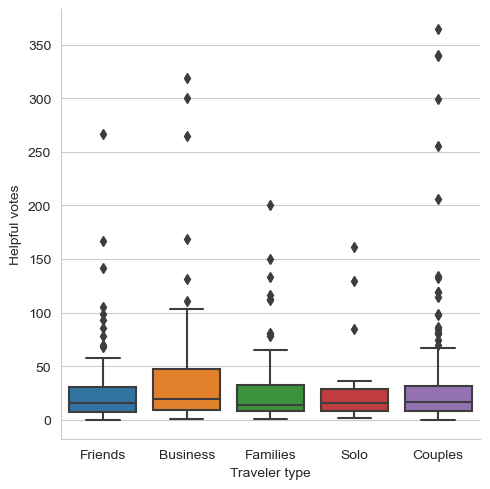

In [35]:
# Create a boxplot
sns.catplot(x='Traveler type',y='Helpful votes',data=trips,kind='box')
plt.show()

###  It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.

### Now let's summarize a numerical variable across the different levels of a categorical variable
1. **Mean Estimates**: The height of each bar on the chart represents a point estimate for the mean value of the data.

2. **Confidence Intervals (CIs)**: The black lines on the chart represent confidence intervals around the mean estimates.

3. **Statistical Significance**: The intervals indicate a range where there's a 95% confidence that the true population mean lies.

4. **Interpretation Example**: For instance, if examining Scores for those labeled "friends" travelers, the mean estimate would be slightly above four with a small confidence interval.

5. **Comparison**: Conversely, the mean for solo travelers is below four, and its confidence interval is larger, indicating less precision in the estimate.


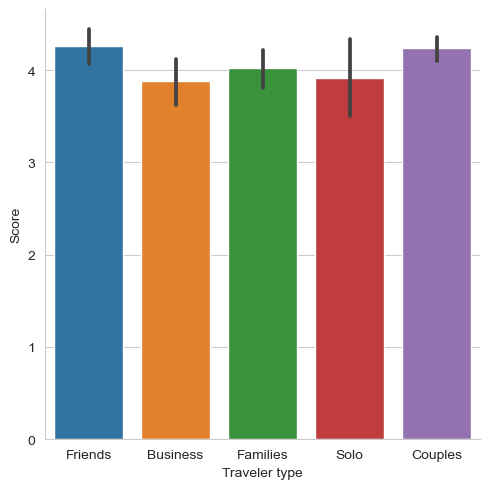

In [36]:
sns.catplot(x='Traveler type', y='Score', data= trips, kind='bar')
plt.show()

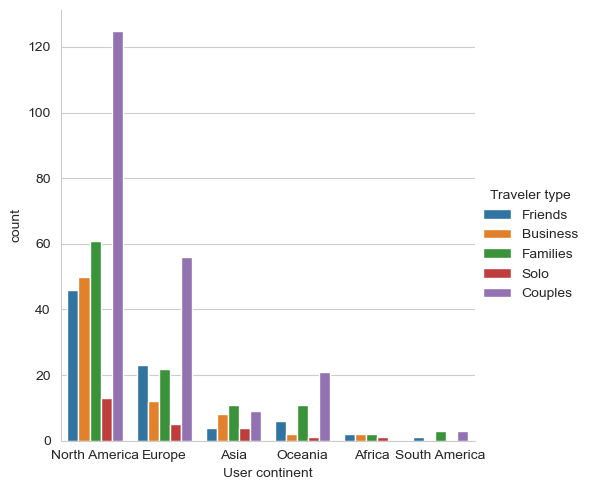

In [37]:
sns.catplot(x='User continent', hue='Traveler type', data= trips, kind='count')
plt.show()

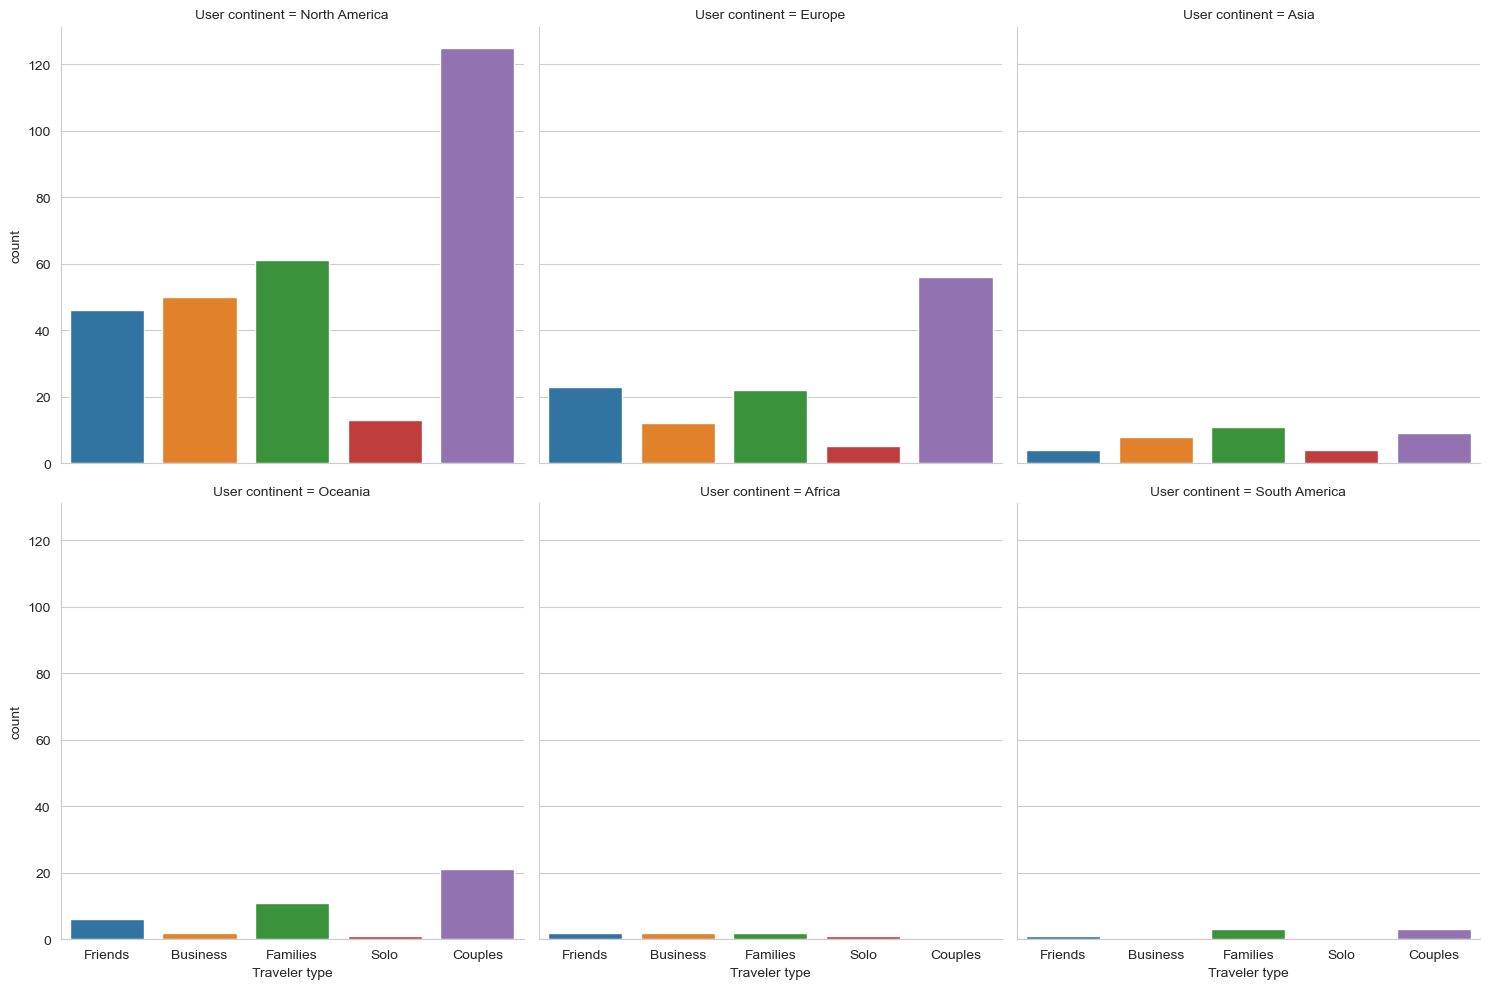

In [38]:
sns.catplot(x='Traveler type', kind='count', col='User continent',
            col_wrap = 3, data= trips,)
plt.show()

# Label encoding and one-hot encoding
- Label encoding assigns integers to categorical values, typically starting at 0 and ending at n - 1. It simplifies responses, saves memory, but isn't optimal for machine learning.

In [39]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

## Boolean coding
- **Boolean Coding for Categorical Columns**:
  - A common practice in label encoding involves creating a Boolean code representing specific categories or groups within a column.
  - Utilize NumPy's 'where' function to assign 1 for true conditions and 0 for false conditions based on predefined criteria.
  - In an example, about 4,400 out of 38,000 used cars are identified as vans based on body type names.

- **NumPy's 'where' Function Usage**:
  - NumPy's 'where' function facilitates the creation of Boolean codes, enabling the assignment of values based on specified conditions.
  - Conditions like containing specific letters in body type names determine 1 (true) or 0 (false) values.
  - In practice, only a fraction of the used cars, around 4,400, are categorized as vans.

- **Application and Output Analysis**:
  - Implementation of Boolean coding enhances categorization efficiency for specific groups, such as vans among used cars.
  - The 'where' function enables precise assignment of 1 or 0 values based on defined conditions, aiding in data analysis.
  - Output examination reveals the proportion of used cars identified as vans, facilitating insights into dataset characteristics.


In [41]:
cars['body_type'].str.contains('van', regex=False)

0        False
1        False
2        False
3        False
4        False
         ...  
38526    False
38527    False
38528    False
38529     True
38530     True
Name: body_type, Length: 38531, dtype: bool

In [42]:
cars['van_code'] = np.where(
    cars['body_type'].str.contains('van', regex=False),1,0)
cars['van_code'].value_counts()

0    34115
1     4416
Name: van_code, dtype: int64

In [43]:
# Convert to categorical and print the frequency table
cars["color"] = cars["color"].astype("category")
cars["color"].value_counts()

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64

In [44]:
# Label encode the 'color' column
cars['color'].unique()

['silver', 'blue', 'red', 'black', 'grey', ..., 'white', 'green', 'violet', 'orange', 'yellow']
Length: 12
Categories (12, object): ['black', 'blue', 'brown', 'green', ..., 'silver', 'violet', 'white', 'yellow']

In [45]:
# Create a label encoding
cars["color_code"] = cars["color"].cat.codes

In [46]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,van_code,color_code
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,False,True,False,True,True,True,16,0,8
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,True,True,False,False,False,True,83,0,1
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,True,True,151,0,7
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,86,0,1
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,True,7,0,0


In [47]:
# Print the new color map to see which codes map to which categories.
# Create codes and categories objects
codes = cars["color"].cat.codes
categories = cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
color_map

{8: 'silver',
 1: 'blue',
 7: 'red',
 0: 'black',
 4: 'grey',
 6: 'other',
 2: 'brown',
 10: 'white',
 3: 'green',
 9: 'violet',
 5: 'orange',
 11: 'yellow'}